# Qu'est-ce qu'une image ?

![photo](camera.jpg)

Une partie de l'intelligence artificielle traite des images. Les algorithmes de **vision par ordinateur** (computer vsion) peuvent résoudre différentes tâches :

- la classification d'images (image classification)

- la détection d'objets (object detection)

- la segmentation d'images (image segmentation / semantic segmentation)

- la génération d'images (image generation)

- ...

Dans cette activité, nous allons étudier des **images** pour comprendre **comment les manipuler**.

## Ressources

- Images, Pixels and RGB : https://www.youtube.com/watch?v=15aqFQQVBWU

- Computer Vision - Deep Learning Dictionary : https://www.youtube.com/watch?v=QQxRal3HSvg

- Microsoft Azure AI Fundamentals: Explore computer vision : https://docs.microsoft.com/en-us/learn/paths/explore-computer-vision-microsoft-azure/

## Recherche d'informations 

- Sous quelle forme est stockée une image en informatique ?

- En Python, sous quelles formes peut-on manipuler une image ?

- Quels sont les différents formats d'images ?

- Lister des bibliothèques Python utiles pour travailler avec des images

In [1]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

## Images en niveaux de gris

Les images en **niveaux de gris** sont les plus **simples** à manipuler car elles ne contiennent qu'**un channel** (à la différence des images en couleurs qui en possèdent 3 au moins)

**Activité :**

- Télécharger le fichier "image.csv"

- Ouvrir le fichier à l'aide d'un tableur (Google sheet, Calc, Excel...)

- Trouver un moyen d'afficher l'image contenue dans le fichier CSV dans la feuille de calcul à partir des valeurs de pixels. Que représente cette image ?

- Importer le fichier "image.csv" dans un dataframe Pandas sans entêtes

- Afficher le nombre de pixels en hauteur et en largeur de l'image

- Afficher la valeur minimale et la valeur maximale du dataframe

- Afficher l'image contenue dans le dataframe à l'aide de la fonction `imshow()` de matplotlib

In [2]:
df = pd.read_csv("image.csv", header=None)
print(df.info())
plt.imshow(df, cmap="gray")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 200 entries, 0 to 199
dtypes: int64(200)
memory usage: 209.5 KB
None


In [3]:
df.min().min(), df.max().max()

(0, 255)

## Images en couleur

La bibliothèque Pillow permet de faire du traitement d'images de différents formats (PNG, JPEG, GIF, TIFF, BMP...)

**Activité :**

- Récupérer le fichier d'image à partir de l'url "https://static.nationalgeographic.fr/files/styles/image_3200/public/pangolin-cites-03.ngsversion.1501687833883.adapt_.1900.1.jpg" à l'aide d'urllib et de Pillow

- Afficher l'image à l'aide de Pillow

- Transformer l'image de Pillow en tableau Numpy et afficher l'image à l'aide de matplotlib

- Changer tous les pixels rouge à la valeur 0 et afficher la nouvelle image

- Transformer le nouveau tableau Numpy en image Pillow à l'aide de la fonction `fromarray()`

- Enregistrer l'image sur votre ordinateur au format JPEG

In [4]:
image = Image.open(urllib.request.urlopen('https://static.nationalgeographic.fr/files/styles/image_3200/public/pangolin-cites-03.ngsversion.1501687833883.adapt_.1900.1.jpg'))
print(image.format)
print(image.size)
print(image.mode)
image.show()

JPEG
(1900, 1266)
RGB


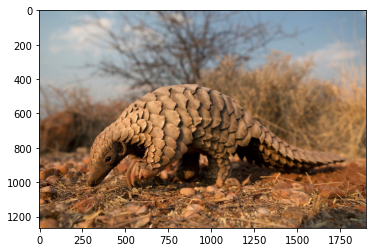

In [5]:
arr = np.asarray(image)
plt.imshow(arr)

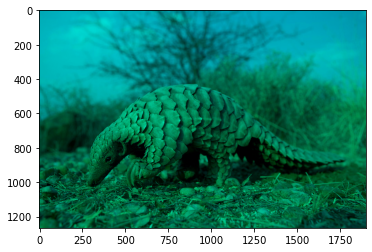

In [6]:
arr[:,:,0]=0
plt.imshow(arr)

In [58]:
image2 = Image.fromarray(arr)
image2.save('pangolin.jpeg')

## Image à partir d'un tableau numpy

On peut créer directement des images à partir de tableaux numpy. Pour la mise en application, on va créer le drapeau de l'Ukraine à partir de zéro.

Ressources :

 https://fr.wikipedia.org/wiki/Drapeau_de_l%27Ukraine

**Activité :**

- Récupérer la couleur en RGB du haut du drapeau (la couleur bleue) et du bas (la couleur jaune)

- Créer le tableau numpy du haut du drapeau en dimension (shape) 75x225x3 avec les valeur de RGB

- Créer le tableau numpy du bas du drapeau en dimension (shape) 75x225x3 avec les valeur de RGB

- Concaténer les deux tableaux pour obtenir un tableau de dimension 150x225x3

- Afficher le résultat

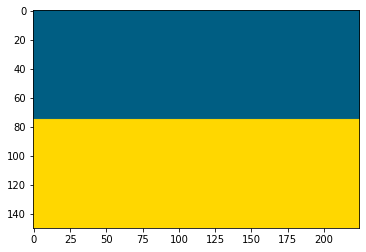

In [7]:
# Bleu 0 94 131
top = np.array((np.full((225, 75), 0), np.full((225, 75), 94), np.full((225, 75), 131)))
# Jaune 255 215 0
bottom = np.array((np.full((225, 75), 255), np.full((225, 75), 215), np.full((225, 75), 0)))
flag = np.concatenate((top, bottom), axis=2)
plt.imshow(flag.T)

In [46]:
top.T.shape

(75, 225, 3)

## Images en couleurs avec transparence

Les images au format PNG permettent d'avoir de la transparence grâce à un channel supplémentaire

Ressources :

- https://matplotlib.org/stable/tutorials/introductory/images.html

- https://matplotlib.org/stable/tutorials/colors/colormaps.html

**Activté :**

- A l'aide de la fonction `imread` de matplotlib, récupérer l'image "chat.png" dans un tableau numpy

- Afficher les dimensions du tableau Numpy

- Afficher l'image avec tous les channels à l'aide de matplotlib

- Afficher uniquement le channel de transparence

- Sur une même ligne horizontale, afficher les images des 4 channels de l'image à l'aide de la fonction `subplots` de matplotlib

In [8]:
# Récupérer l'image sous forme d'un tableau Numpy
img = mpimg.imread('chat.png')
print(type(img), img.shape)

# Afficher l'image
plt.imshow(img)

<class 'numpy.ndarray'> (532, 474, 4)


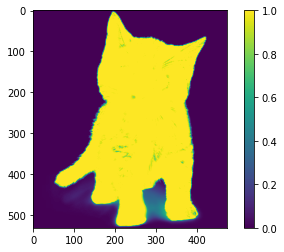

In [9]:
plt.imshow(img[:,:,3])
plt.colorbar()

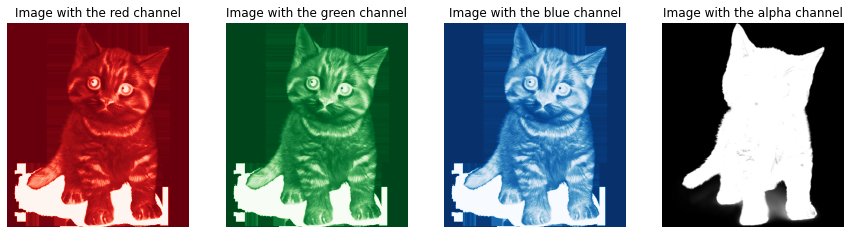

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, color in enumerate(zip(["Reds", "Greens", "Blues", "gray"], ["red", "green", "blue", "alpha"])):
    axs[i].imshow(img[:,:, i], cmap=color[0])
    axs[i].set_title(f"Image with the {color[1]} channel")
    axs[i].axis('off')
plt.show()

## Manipulation d'images sous forme de tableaux Numpy

**Activité :**

PARTIE 1

- A l'aide de la fonction `imread` de matplotlib, récupérer l'image "chat.png" dans un tableau numpy

- A l'aide d'un slicing sur le tableau Numpy, sélectionner uniquement la tête du chat (cropped image)

- A l'aide d'un slicing sur le tableau Numpy, sélectionner uniquement les pattes du chat (cropped image)

- Effectuer une transposée du tableau numpy du channel 0 (couleur rouge) de l'image. Afficher l'image du channel 0 et l'image de la transposée

- Diminuer le nombre de pixels de l'image d'un facteur 10 à l'aide du slicing du tableau Numpy et afficher l'image


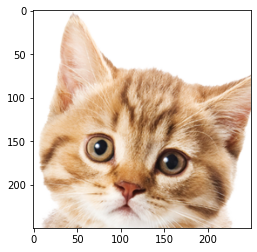

In [11]:
# Sélectionner seulement la tete du chat
plt.imshow(img[:250,150:400])

In [12]:
# Sélectionner seulement les pattes du chat
plt.imshow(img[400:,130:400])

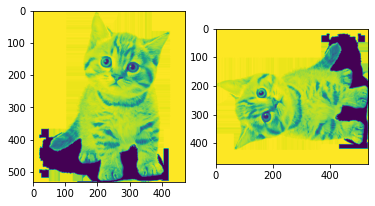

In [13]:
# Transposée
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img[:,:, 0])
axs[1].imshow(img[:,:, 0].T)
plt.show()

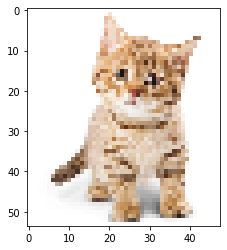

In [14]:
# Diminution de taille
plt.imshow(img[::10,::10])
plt.show()

**Activité :**

PARTIE 2

La partie 2 s'appuie sur une partie des conclusions d'un article scientifique ([lien vers l'article](https://www.sciencesetavenir.fr/sante/cerveau-et-psy/la-beaute-universelle-existe-t-elle_104396)). Selon ces conclusions, la symètrie d'un visage serait un critère important de beauté. En se basant sur cette idée, un artiste australien, Julian Wolkenstein, a créé des portraits parfaitement symétriques ([lien vers l'article](https://www.huffingtonpost.fr/2012/10/10/photo-portrait-symetrique-julian-wolkenstein-echoism_n_1953863.html)).
![plb](plb.jpeg)

- Récupérer le portrait d'une personnalité ou de vous dans un tableau Numpy

- Trouver la ligne du milieu du visage et créer un tableau numpy de cette moitié d'image (coupée suivant la largeur)

- Créer la deuxième moitié de l'image en inversant (à l'aide du slicing) le tableau Numpy précédant

- Concaténer les deux images à l'aide de la fonction de numpy `np.hstack()` et afficher l'image

In [15]:
pl_img = mpimg.imread('plb.jpeg')
print(type(pl_img), pl_img.shape)

<class 'numpy.ndarray'> (1900, 3500, 3)


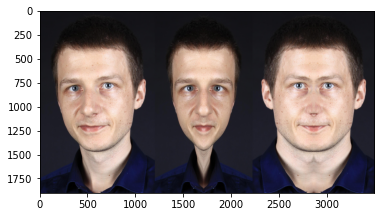

In [16]:
plt.imshow(pl_img)
plt.show()

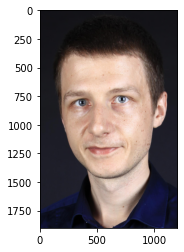

In [17]:
pl_ori = pl_img[:,:1200]
plt.imshow(pl_ori)
plt.show()

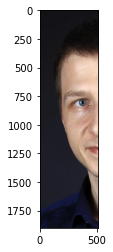

In [19]:
pl_left = pl_ori[:,:510]
plt.imshow(pl_left)
plt.show()

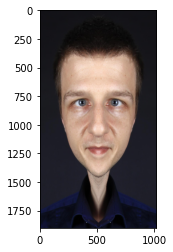

In [24]:
final_img = np.hstack([pl_left, pl_left[:,::-1]])
plt.imshow(final_img)
plt.show()

## Manipulation d'images avec Pillow

**Activité :**

- Récupérer le fichier d'image "camera.jpg" à l'aide de Pillow et afficher l'image

- Passer l'image en nuances de gris à l'aide de la méthode `convert()`

- Changer la taille de l'image à l'aide de la méthode `thumbnail()` (taille 100x100). Afficher la taille de l'image et vérifier que le ratio de l'image **est conservé**

- Changer la taille de l'image à l'aide de la méthode `resize()` (taille 100x100). Afficher la taille de l'image et vérifier que le ratio de l'image **n'est pas conservé**

- Inverser l'image entre droite/gauche puis haut/bas à l'aide de la méthode `transpose()`

- Récupérer uniquement le téléphone de l'image à l'aide de la méthode `crop()`

In [61]:
image = Image.open("camera.jpg")
image.show()

In [63]:
image.convert("L").show()

In [65]:
image.thumbnail((100,100))
image.show()

In [70]:
image = Image.open("camera.jpg")
image.resize((100,100)).show()

In [71]:
image = Image.open("camera.jpg")
image.transpose(Image.FLIP_LEFT_RIGHT).show()

In [72]:
image = Image.open("camera.jpg")
image.transpose(Image.FLIP_TOP_BOTTOM).show()

In [80]:
image = Image.open("camera.jpg")
image.crop((250,60, 400, 350)).show()